# Predictive Model to find Market Value of a Player

## OJAAS HAMPIHOLI

27 April, 2020

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import copy
import os

In [2]:
print("Reading the data")
data = pd.read_csv("data.csv")
fifa = copy.deepcopy(data)
fifa

Reading the data


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


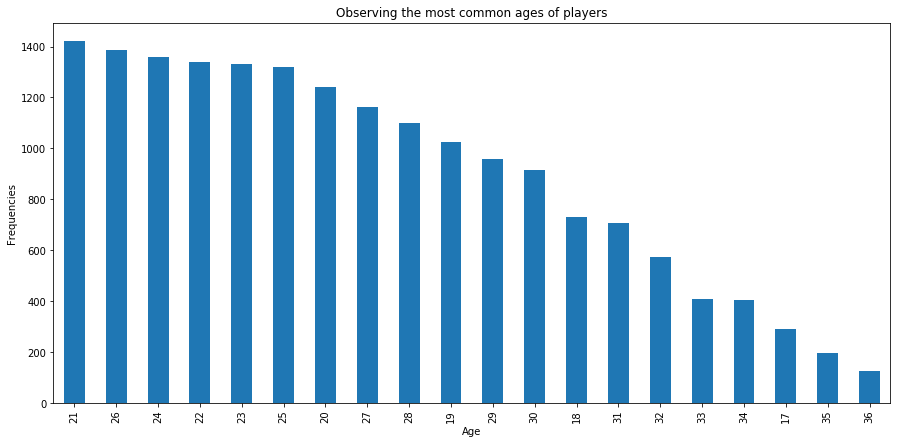

In [3]:
fifa["Age"].value_counts().head(20).plot(kind = 'bar', figsize = [15,7])
plt.title("Observing the most common ages of players")
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.show()

The most common ages of players in football is alos what is considered their prime age i.e. 21-25. This is seen very clearly in the graph above. Also it is a known fact that there are very less players above the age of 35. This fact also can be confirmed from the graph above.

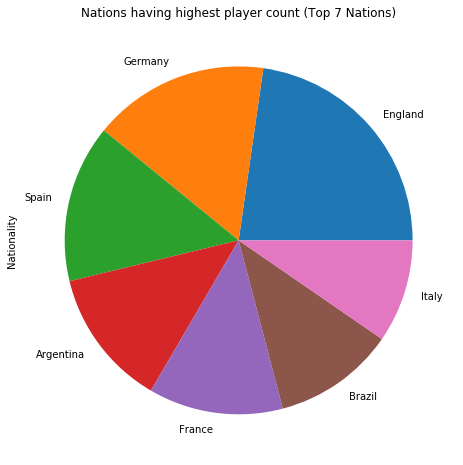

In [4]:
fifa["Nationality"].value_counts().head(7).plot(kind = 'pie', figsize = [8,8])
plt.title("Nations having highest player count (Top 7 Nations)")
plt.show()

From the graph above, we can clearly see that majority of the players can be found in countries like England, Germany and Spain, followed closely by Argentina, France, Brazil and Italy.

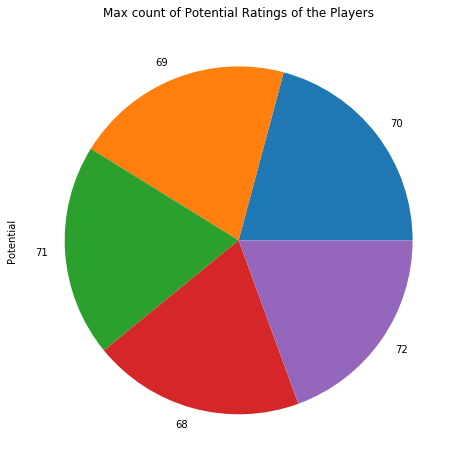

In [5]:
fifa["Potential"].value_counts().head(5).plot(kind = 'pie', figsize = [15,8])
plt.title("Max count of Potential Ratings of the Players")
plt.show()

From the pie chart above, we can see that the potential ratings for most of the players is between 68 and 72. This helps to prove the hypothesis that most common ratings group in football is 65-75 and that only the premium and best players have ratings above 80.

In [6]:
print("Pre-processing Step 1")
fifa = copy.deepcopy(data)
to_Drop = ["ID", "Photo", "Flag", "Club Logo", "Special","International Reputation", "Weak Foot", "Skill Moves", "Real Face",
          "Height", "Weight", "Loaned From", "Contract Valid Until", "Club", "Position", "Work Rate",
          "Body Type", "Jersey Number", "Preferred Foot","Joined","Nationality","Age"]

fifa = fifa.drop(columns = to_Drop)
fifa['Value'] = fifa['Value'].str.split('\u20AC').str[1]
fifa['Wage'] = fifa['Wage'].str.split('\u20AC').str[1]
fifa['Release Clause'] = fifa['Release Clause'].str.split('\u20AC').str[1]

repl_dict = {'[kK]': '*1000', '[mM]': '*1000000', '[bB]': '*1000000000', }

fifa['Value'] = fifa['Value'].replace(repl_dict, regex=True)
new = fifa["Value"].str.split("*", n = 1, expand = True) 
#print(new)
# making separate first name column from new data frame 
fifa["Value1"]= new[0] 
fifa["Value2"]= new[1]
fifa['Value1'] = pd.to_numeric(fifa['Value1'], errors='coerce')
fifa['Value2'] = pd.to_numeric(fifa['Value2'], errors='coerce')
fifa['Value'] = fifa['Value1'] * fifa['Value2']
fifa = fifa.drop(columns = ['Value1', 'Value2'])
#print("Done with Value")
fifa['Wage'] = fifa['Wage'].replace(repl_dict, regex=True)
new = fifa["Wage"].str.split("*", n = 1, expand = True) 
#print(new)
# making separate first name column from new data frame 
fifa["Wage1"]= new[0] 
fifa["Wage2"]= new[1]
fifa['Wage1'] = pd.to_numeric(fifa['Wage1'], errors='coerce')
fifa['Wage2'] = pd.to_numeric(fifa['Wage2'], errors='coerce')
fifa['Wage'] = fifa['Wage1'] * fifa['Wage2']
fifa = fifa.drop(columns = ['Wage1', 'Wage2'])

# aking separate first name column from new data frame
fifa['Release Clause'] = fifa['Release Clause'].replace(repl_dict, regex=True)
new = fifa["Release Clause"].str.split("*", n = 1, expand = True)
fifa["Wage1"]= new[0] 
fifa["Wage2"]= new[1]
fifa['Wage1'] = pd.to_numeric(fifa['Wage1'], errors='coerce')
fifa['Wage2'] = pd.to_numeric(fifa['Wage2'], errors='coerce')
fifa['Release Clause'] = fifa['Wage1'] * fifa['Wage2']
fifa = fifa.drop(columns = ['Wage1', 'Wage2'])
newValue = fifa.mean()
#newValue = int(newValue)
#print(newValue)
fifa = fifa.fillna(newValue)

print("Success")
fifa

Pre-processing Step 1
Success


,Unnamed: 0,Name,Overall,Potential,Value,Wage,LS,ST,RS,LW,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,94,94,110500000.0,565000.0,88+2,88+2,88+2,92+2,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,Cristiano Ronaldo,94,94,77000000.0,405000.0,91+3,91+3,91+3,89+3,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,Neymar Jr,92,93,118500000.0,290000.0,84+3,84+3,84+3,89+3,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,De Gea,91,93,72000000.0,260000.0,NaN,NaN,NaN,NaN,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,K. De Bruyne,91,92,102000000.0,355000.0,82+3,82+3,82+3,87+3,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,J. Lundstram,47,65,60000.0,1000.0,42+2,42+2,42+2,44+2,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,18203,N. Christoffersson,47,63,60000.0,1000.0,45+2,45+2,45+2,39+2,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,18204,B. Worman,47,67,60000.0,1000.0,45+2,45+2,45+2,45+2,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,18205,D. Walker-Rice,47,66,60000.0,1000.0,47+2,47+2,47+2,47+2,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In the block above, we have removed the Euro sign from the Wage, Value and the Release Contract columns.

In [7]:
print("Pre-processing Step 2")
fifa.LS = fifa.LS.apply(lambda x: pd.Series(str(x).split("+")))
fifa.ST = fifa.ST.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RS = fifa.RS.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LW = fifa.LW.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LF = fifa.LF.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CF = fifa.CF.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RF = fifa.RF.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RW = fifa.RW.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LAM = fifa.LAM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CAM = fifa.CAM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RAM = fifa.RAM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RM = fifa.RM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LM = fifa.LM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CM = fifa.CM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RCM = fifa.RCM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LCM = fifa.LCM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LWB = fifa.LWB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LDM = fifa.LDM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CDM = fifa.CDM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RDM = fifa.RDM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RWB = fifa.RWB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LB = fifa.LB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LCB = fifa.LCB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CB = fifa.CB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RCB = fifa.RCB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RB = fifa.RB.apply(lambda x: pd.Series(str(x).split("+")))
print("Success")
fifa

Pre-processing Step 2
Success


,Unnamed: 0,Name,Overall,Potential,Value,Wage,LS,ST,RS,LW,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,94,94,110500000.0,565000.0,88,88,88,92,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,Cristiano Ronaldo,94,94,77000000.0,405000.0,91,91,91,89,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,Neymar Jr,92,93,118500000.0,290000.0,84,84,84,89,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,De Gea,91,93,72000000.0,260000.0,nan,nan,nan,nan,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,K. De Bruyne,91,92,102000000.0,355000.0,82,82,82,87,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,J. Lundstram,47,65,60000.0,1000.0,42,42,42,44,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,18203,N. Christoffersson,47,63,60000.0,1000.0,45,45,45,39,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,18204,B. Worman,47,67,60000.0,1000.0,45,45,45,45,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,18205,D. Walker-Rice,47,66,60000.0,1000.0,47,47,47,47,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


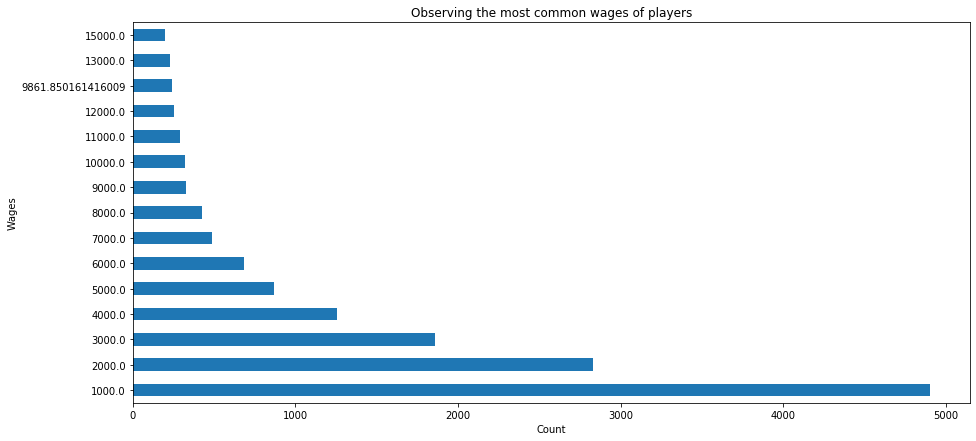

In [8]:
fifa["Wage"].value_counts().head(15).plot(kind = 'barh', figsize = [15,7])
plt.title("Observing the most common wages of players")
plt.xlabel("Count")
plt.ylabel("Wages")
plt.show()

We can see that the lesser wage amounts are very common occurance in football players. A lot of players have between 1000 and 15000 euros in wages.

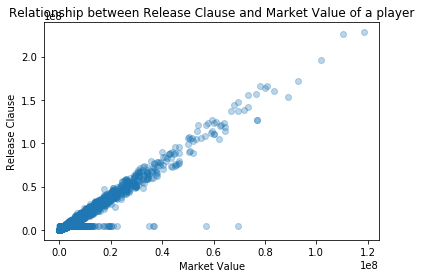

In [9]:
plt.scatter(fifa['Value'],fifa['Release Clause'], alpha = 0.3)
plt.title("Relationship between Release Clause and Market Value of a player")
plt.xlabel("Market Value")
plt.ylabel("Release Clause")
plt.show()

The graph above shows the general relationship between the Market Value and the release clause of a player. If the market value of a player is high, the release clause of the player will naturally be high.

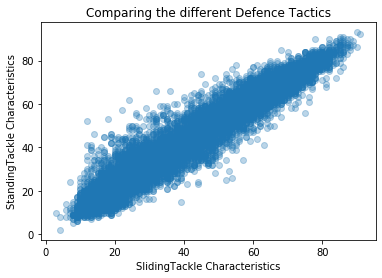

In [10]:
plt.scatter(fifa['SlidingTackle'],fifa['StandingTackle'], alpha = 0.3)
plt.title("Comparing the different Defence Tactics")
plt.xlabel("SlidingTackle Characteristics")
plt.ylabel("StandingTackle Characteristics")
plt.show()

The correlation between the defensive characteristics of any player is a strong positive relationship.

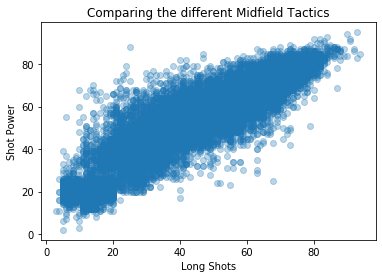

In [11]:
plt.scatter(fifa['LongShots'],fifa['ShotPower'], alpha = 0.3)
plt.title("Comparing the different Midfield Tactics")
plt.xlabel("Long Shots")
plt.ylabel("Shot Power")
plt.show()

The same trend can be observed for the midfield characteristics as well.

In [12]:
my_imputer = SimpleImputer(strategy='mean')
a = np.random.randint(1,100)
train, test = train_test_split(fifa, test_size = 0.2, random_state=a)
dropColumn = ["Name", "Value", "Wage", "Release Clause"]

trainY = train["Value"].tolist()
trainNames = train["Name"].tolist()
trainX = train.drop(columns = dropColumn)
trainX = trainX.fillna(trainX.mean())
#missing_val_count_by_column = (trainX.isna().sum())
#print(missing_val_count_by_column)
trainX = my_imputer.fit_transform(trainX)
trainX = normalize(trainX)


testY = test["Value"].tolist()
testNames = test["Name"].tolist()
testX = test.drop(columns = dropColumn)
testX = testX.fillna(testX.mean())
#missing_val_count_by_column = (testX.isna().sum())
#print(missing_val_count_by_column)
testX = my_imputer.fit_transform(testX)
testX = normalize(testX)


print("Size of the training dataset is",train.shape)
print("Size of the testing dataset is",test.shape)
#test.columns

Size of the training dataset is (14565, 67)
Size of the testing dataset is (3642, 67)


In [13]:
# Fitting the Linear Regression Model
print("Fitting a Linear Regression Model to the data")
print("Training the model...........")
reg = LinearRegression(fit_intercept = True, normalize = True).fit(trainX, trainY)
print("Model to be fit is", reg)
print("Accuracy of the model fitted on Training set",round(reg.score(trainX, trainY),2))

#Predicting the Model on the Test set
print("Testing the data...........")
predY = reg.predict(testX)

predY = predY.tolist()
#testY = testY.tolist()
for i in range(len(predY)):
    predY[i] = int(predY[i])
    testY[i] = int(testY[i])
    
#print(reg.score(testX,testY))
#Printing the R^2 Accuracy of the Linear Regression Model
print('Accuracy of Linear Regression using R^2 Error is',round(reg.score(testX,testY),2))

Fitting a Linear Regression Model to the data
Training the model...........
Model to be fit is LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Accuracy of the model fitted on Training set 0.87
Testing the data...........
Accuracy of Linear Regression using R^2 Error is 0.87


In [14]:
from sklearn.svm import SVR
print("Fitting a SVM Regression Model to the data")
clf = SVR(C=0.001, epsilon=0.01, gamma = 'auto',tol = 1e-2)
print("Model to be fit is", clf)
print("Training the model...........")
clf.fit(trainX, trainY)
print(clf.score(trainX,trainY))
print("Testing the data...........")
predY = clf.predict(testX)
for i in range(len(predY)):
    predY[i] = int(predY[i])
    testY[i] = int(testY[i])

print('Accuracy of SVM Regression using R^2 Error is',round(r2_score(testY,predY),2))

Fitting a SVM Regression Model to the data
Model to be fit is SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
Training the model...........
-0.09483743503117004
Testing the data...........
Accuracy of SVM Regression using R^2 Error is -0.11


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

print("Fitting a Neural Network Model to the data")
mlp = MLPRegressor(max_iter = 200, random_state = a)
print("Model to be fit is", mlp)
print("Training the model...........")
mlp.fit(trainX,trainY)
print("Testing the data...........")
predY = mlp.predict(testX)
predY = predY.tolist()
#testY = testY.tolist()
for i in range(len(predY)):
    predY[i] = int(predY[i])
    testY[i] = int(testY[i])

#Printing the R^2 Accuracy of the Linear Regression Model
print('Accuracy of Linear Regression using R^2 Error is',round(reg.score(testX,testY),2))

Fitting a Neural Network Model to the data
Model to be fit is MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=38, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training the model...........
Testing the data...........
Accuracy of Linear Regression using R^2 Error is 0.87


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
print("Fitting a Decision Tree Regression Model to the data")
print("Training the model...........")
regressor = DecisionTreeRegressor(random_state=a, max_depth = 7, criterion='mse').fit(trainX,trainY)
print("Model to be fit is", regressor)
print("Average of Cross Validation scores over 15 samples is",np.mean(cross_val_score(regressor, trainX, trainY, cv=15)))
print("Testing the data...........")
predY = regressor.predict(testX)
for i in range(len(predY)):
    predY[i] = int(predY[i])
predY = predY.tolist()
print('Accuracy of Decision Tree Regression  is',round(r2_score(testY,predY),2))

Fitting a Decision Tree Regression Model to the data
Training the model...........
Model to be fit is DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=38, splitter='best')
Average of Cross Validation scores over 15 samples is 0.8983665555598738
Testing the data...........
Accuracy of Decision Tree Regression  is 0.92


### RESULT
Hence, we can see that the Decision Tree Regressor performs better than all other models that have been used here for the same tasks.